In [107]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [108]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,auc
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
pd.set_option('Display.max_columns',None)
pd.options.plotting.backend = "plotly"
from imblearn.over_sampling import SMOTE   

In [112]:
df = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\Visual Studio Code\Project\StrokePrediction\healthcare-dataset-stroke-data.csv")

In [113]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [114]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [115]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Question 1
# Drop id as id is of no use.

In [117]:
df = df.drop('id', axis=1)

In [118]:
# CHECKING THE NULL VALUES 
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: xlabel='bmi', ylabel='Density'>

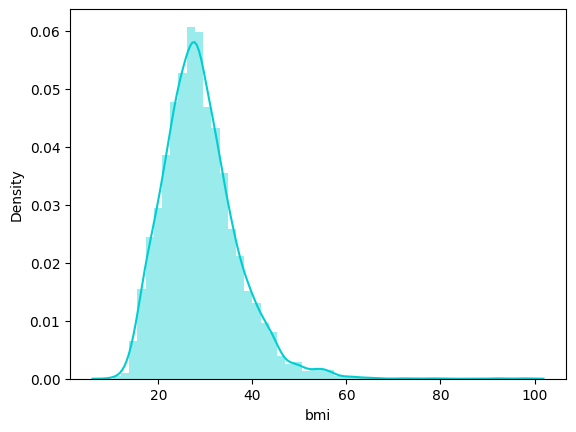

In [119]:
import seaborn as sns

sns.distplot(df['bmi'], color='darkturquoise')

In [120]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [121]:
# CHECKING FOR CATEGORICAL ATTRIBUTES.
cat_col = []
for x in df.dtypes.index:
  if df.dtypes[x] == 'object':
    cat_col.append(x)
cat_col

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [122]:
#PRINT CATEGORICAL COLUMNS.
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()


gender
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

ever_married
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

smoking_status
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64



In [123]:
gender_stroke = df.groupby(["gender","stroke"])[["stroke"]].count()
gender_stroke

stroke
gender stroke        
Female 0         2853
       1          141
Male   0         2007
       1          108
Other  0            1

We see a similar stroke rate in Male and Female. There is 'Other' gender which only have 1 sample. We remove this.

In [124]:
df_delete = df[df['gender'] == 'Other'].index
df = df.drop(df_delete)

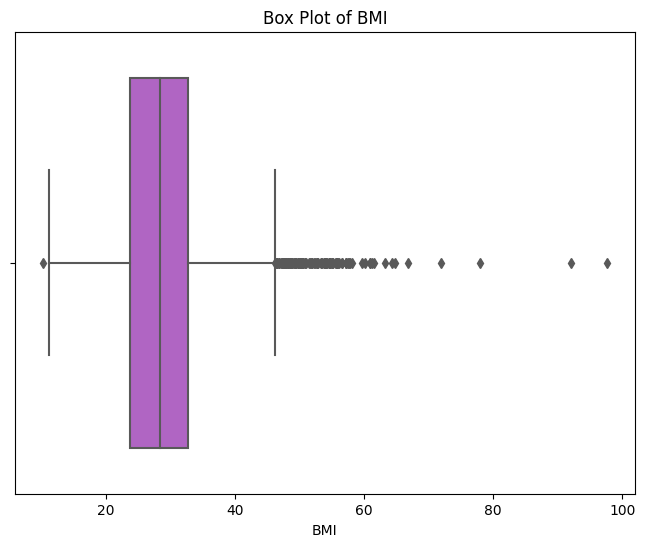

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into the DataFrame 'df'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['bmi'], color='mediumorchid')
plt.xlabel('BMI')
plt.title('Box Plot of BMI')
plt.show()


In [126]:
# DEALING WITH OUTLIERS.
# Using quantile method to remove outliers for bmi index
q = df['bmi'].quantile(0.99)
df = df[df['bmi']<q]

In [127]:
# Numerical variables
# age, avg_glucose_level, bmi

# Categorical variables
# gender, stroke, smoking_status, heart_disease, ever_married, hypertension, work_type, Residence_type


In [129]:
categorical = (df.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

print('-----------------------------------\n')

numerical = (df.dtypes == "float64")
numerical_list = list(numerical[numerical].index)

print("Numerical variables:")
print(numerical_list)

Categorical variables:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
-----------------------------------

Numerical variables:
['age', 'avg_glucose_level', 'bmi']


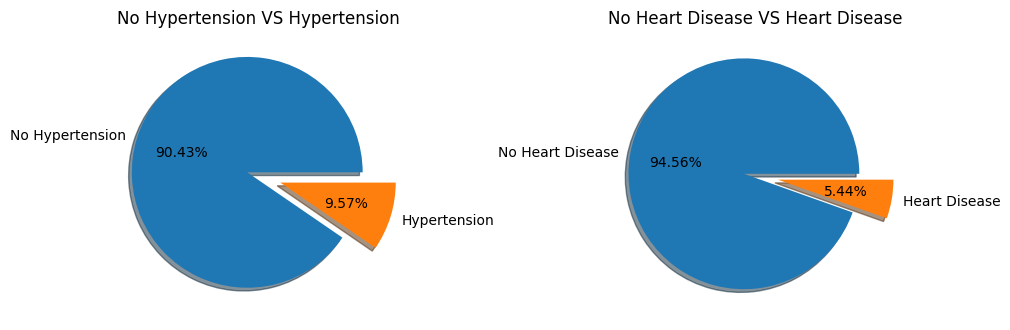

In [130]:
StrokeAnalysis = df.copy()

StrokeAnalysis['hypertension'] = StrokeAnalysis['hypertension'].apply(lambda x : 'Hypertension' if x == 1 else 'No Hypertension') 
StrokeAnalysis['heart_disease'] = StrokeAnalysis['heart_disease'].apply(lambda x : 'Heart Disease' if x == 1 else 'No Heart Disease') 
StrokeAnalysis['stroke'] = StrokeAnalysis['stroke'].apply(lambda x : 'Suffered Stroke' if x == 1 else 'Never Suffered Stroke') 
StrokeAnalysis['ever_married'] = StrokeAnalysis['ever_married'].apply(lambda x : 'Married' if x == 'Yes' else 'Unmarried') 


# NO HYPERTENSION VS HYPERTENSION & NO HEART DISEASE VS HEART DISEASE

plt.figure(figsize=(10,6))
placement = 1

for i in ['hypertension','heart_disease']:
    label = []
    value = []
    for j in range(len(StrokeAnalysis[i].value_counts().index)):
      label.append(StrokeAnalysis[i].value_counts().index[j])
      value.append(StrokeAnalysis[i].value_counts()[j])
        
    plt.subplot(1,2,placement)    
    explode = (0.1, 0.2)
    plt.pie(value, labels = label, autopct='%1.2f%%', shadow=True, explode=explode)
    plt.title("{} VS {}".format(label[0],label[1]))
    placement += 1
    
plt.tight_layout(pad=0.4) 

The propotion of patients with hypertension and heart diseases are very low.

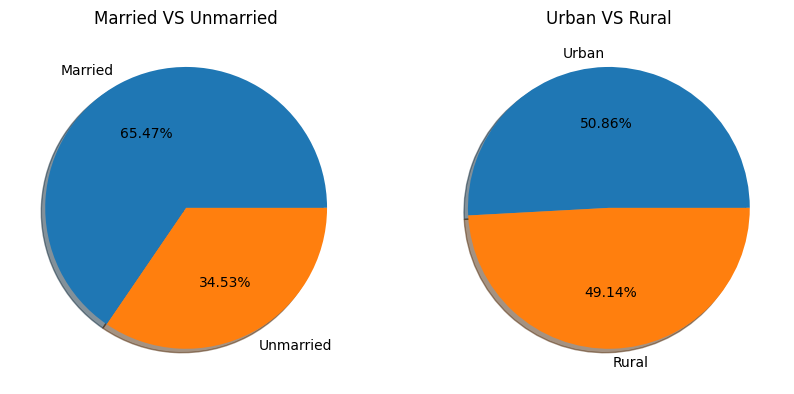

In [131]:
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into the DataFrame 'StrokeAnalysis'

plt.figure(figsize=(10, 6))
placement = 1

for i in ['ever_married', 'Residence_type']:
    label = []
    value = []
    for j in range(len(StrokeAnalysis[i].value_counts().index)):
        label.append(StrokeAnalysis[i].value_counts().index[j])
        value.append(StrokeAnalysis[i].value_counts()[j])

    plt.subplot(1, 2, placement)
    plt.pie(value, labels=label, autopct='%1.2f%%', shadow=True)
    plt.title("{} VS {}".format(label[0], label[1]))
    placement += 1

plt.show()


We see that the number of patients married are much more. The proportion of rural and urban patients are almost equal.

Pie plot of Work Type
------------------------------------------------------------

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


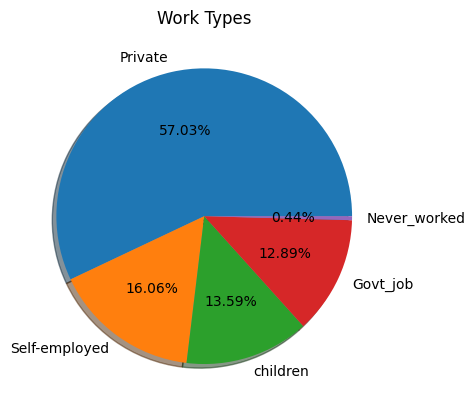

<Figure size 640x480 with 0 Axes>

In [139]:
# WORK TYPE

print("Pie plot of Work Type")
print('------------------------------------------------------------\n')
# Verify column names in the DataFrame
print(StrokeAnalysis.columns)

# Assuming the column names are correct, proceed with the code
if 'work_type' in StrokeAnalysis.columns:
    plt.subplot(1, 1, 1)
    label = StrokeAnalysis['work_type'].value_counts().index
    value = StrokeAnalysis['work_type'].value_counts().values
    plt.pie(value, labels=label, autopct='%1.2f%%', shadow=True, explode=None)
    plt.title("Work Types")
    plt.show()
else:
    print("Column 'work_type' not found in the DataFrame.")
plt.tight_layout(pad=0.4) 

Visualization of the distribution of Numerical columns
------------------------------------------------------------



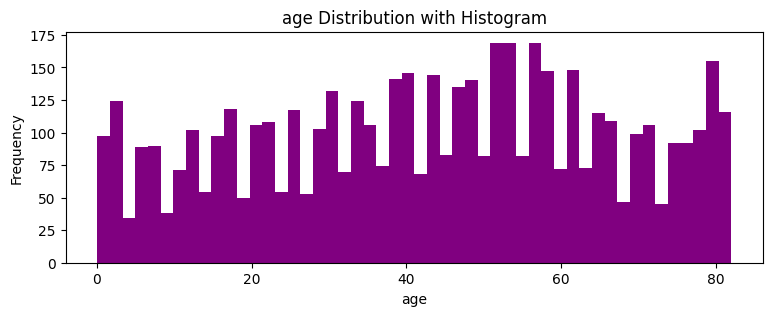

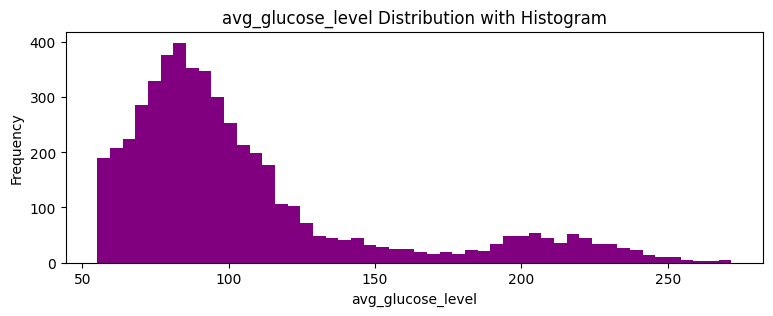

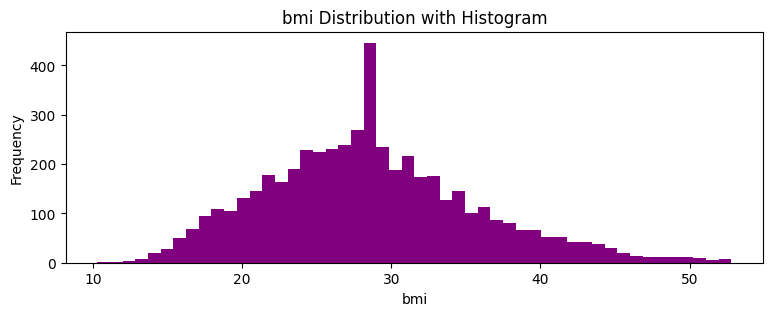

In [141]:
print("Visualization of the distribution of Numerical columns")
print('------------------------------------------------------------\n')

for n in numerical_list:
     plt.figure(figsize=(9, 3))
     plt.hist(df[n], bins=50, color='purple')  # Replace 'purple' with the desired color name or hexadecimal color code
     plt.xlabel(n)
     plt.ylabel("Frequency")
     plt.title("{} Distribution with Histogram".format(n))
     plt.show()


Visualization of stroke vs other columns
-----------------------------------------------------



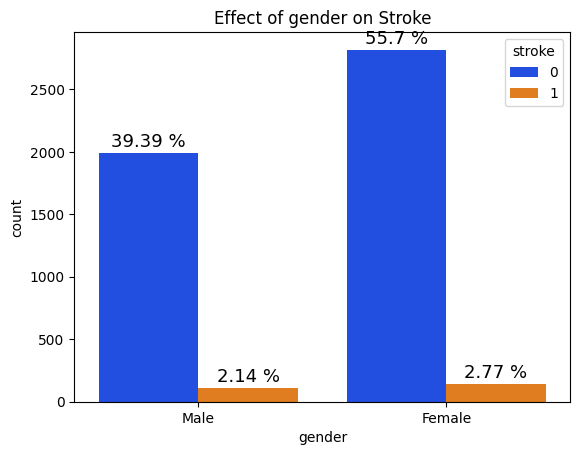

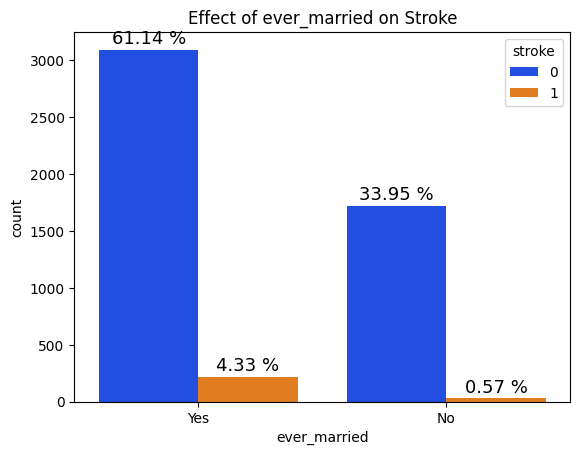

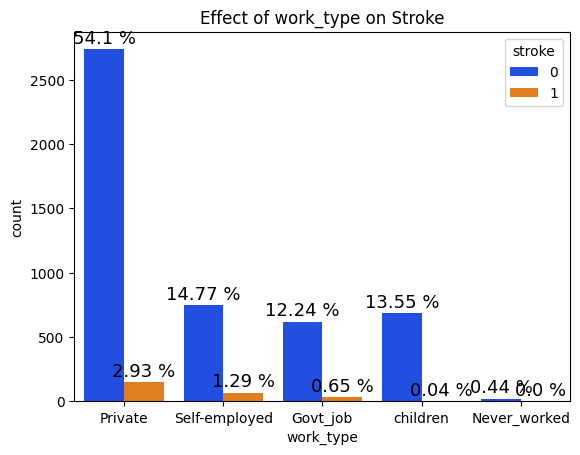

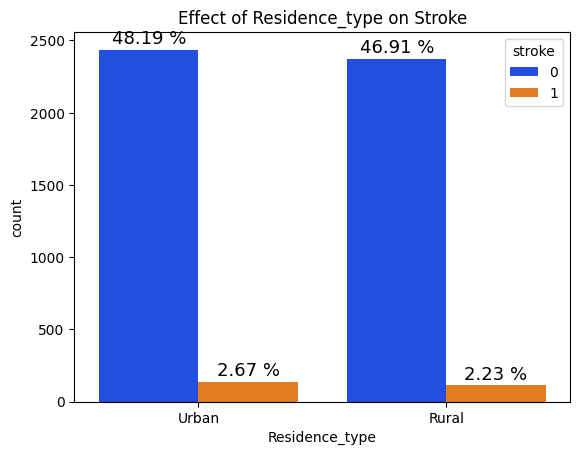

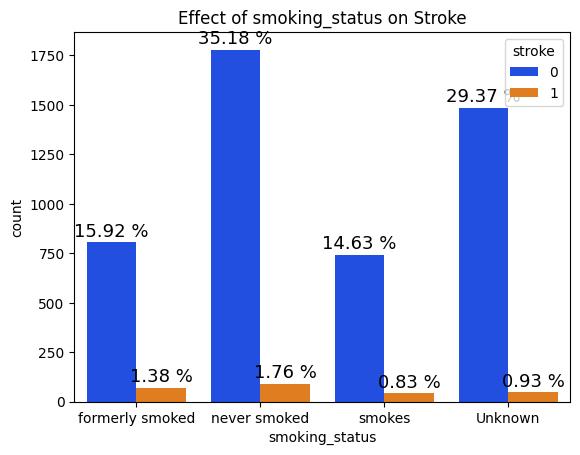

In [143]:
import seaborn as sns

# Define a brighter color palette
bright_palette = sns.color_palette("bright")

print("Visualization of stroke vs other columns")
print('-----------------------------------------------------\n')

for i in categorical_list:
    ax = sns.countplot(data=df, x=i, hue="stroke", palette=bright_palette)
    plt.title("Effect of {} on Stroke".format(i))
    
    for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(df)*100, 2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center', va='center', size=13, xytext=(0, 8), textcoords='offset points')
    plt.show()


Heatmap Correlation
------------------------------------------------------------------



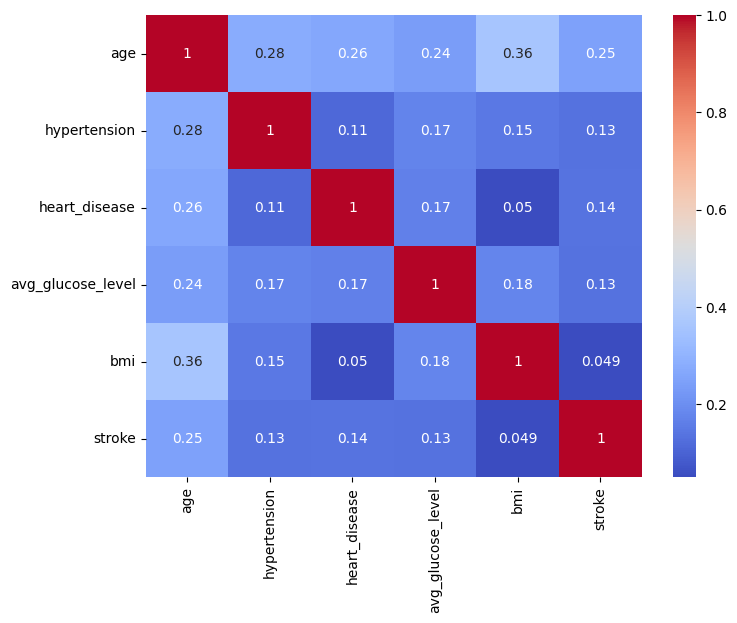

In [145]:
import seaborn as sns

# Drop non-numeric columns (if necessary)
numeric_df = df.select_dtypes(include='number')

print("Heatmap Correlation")
print('------------------------------------------------------------------\n')

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()


Input Split

In [146]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

Encoding Categorical Data
Independent Variable

OneHotEncoder
Dependent Variable

LabelEncoder

In [148]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,4,5,6,9])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [149]:
X.shape

(5057, 20)

Splitting the dataset into the Training set and Test set.

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [151]:
# Initializing empty lists to append all model's name and corresponding name
accuracy = []
model = []

**PICK ANY 3 SUITABLE MODELS FOR THE PREDICTION OF AVERAGE GLUCOSE LEVEL IN BLOOD AND PLOT THE CONFUSION MATRIX FOR THESE MODELS.**

Training the Model on the Training set.

*Kernel SVM *(*WITH CONFUSION MATRIX)*

In [152]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',gamma='scale', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [153]:
acc2 = accuracy_score(y_test, y_pred)
accuracy.append(acc2)
model.append('Kernel SVM')
print("Kernel SVM's Accuracy :", acc2)

Kernel SVM's Accuracy : 0.9496047430830039


In [154]:
# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X_train, y_train, cv=10)
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

K-Fold Validation Mean Accuracy: 95.13 %
Standard Deviation: 0.11 %


In [155]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       961
           1       0.00      0.00      0.00        51

    accuracy                           0.95      1012
   macro avg       0.47      0.50      0.49      1012
weighted avg       0.90      0.95      0.93      1012



*K - Nearest Neighbors* 

In [156]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_knn = sc.fit_transform(X_train[:, 16:])
X_test_knn = sc.transform(X_test[:, 16:])

In [157]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train_knn, y_train)

KNeighborsClassifier(n_neighbors=10)

In [158]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_knn)

In [159]:
acc3 = accuracy_score(y_test, y_pred)
accuracy.append(acc3)
model.append('K-Nearest Neighbors')
print("K-Nearest Neighbours's Accuracy :", acc3)

K-Nearest Neighbours's Accuracy : 0.950592885375494


In [160]:
# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X_train, y_train, cv=10)
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

K-Fold Validation Mean Accuracy: 95.08 %
Standard Deviation: 0.17 %


In [161]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       961
           1       1.00      0.02      0.04        51

    accuracy                           0.95      1012
   macro avg       0.98      0.51      0.51      1012
weighted avg       0.95      0.95      0.93      1012



*RANDOM FOREST CLASSIFICATION.* 

In [162]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [163]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

In [164]:
acc6 = accuracy_score(y_test, y_pred)
accuracy.append(acc6)
model.append('Random Forest Classification')                                                      
print("Random Forest Classification's Accuracy:", acc6)
# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X_train, y_train, cv=10)
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

Random Forest Classification's Accuracy: 0.9496047430830039
K-Fold Validation Mean Accuracy: 94.86 %
Standard Deviation: 0.21 %


In [165]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       961
           1       0.50      0.04      0.07        51

    accuracy                           0.95      1012
   macro avg       0.73      0.52      0.52      1012
weighted avg       0.93      0.95      0.93      1012



In [166]:
s = df[df.stroke == 1]
print(f"Average Glucose Level of people having Stroke = {round(s.groupby('stroke')['avg_glucose_level'].mean()[1],2)}")

Average Glucose Level of people having Stroke = 132.18


In [167]:
ns = df[df.stroke == 0]
print(f"Average Glucose Level of people having Stroke = {round(ns.groupby('stroke')['avg_glucose_level'].mean()[0],2)}")

Average Glucose Level of people having Stroke = 104.63


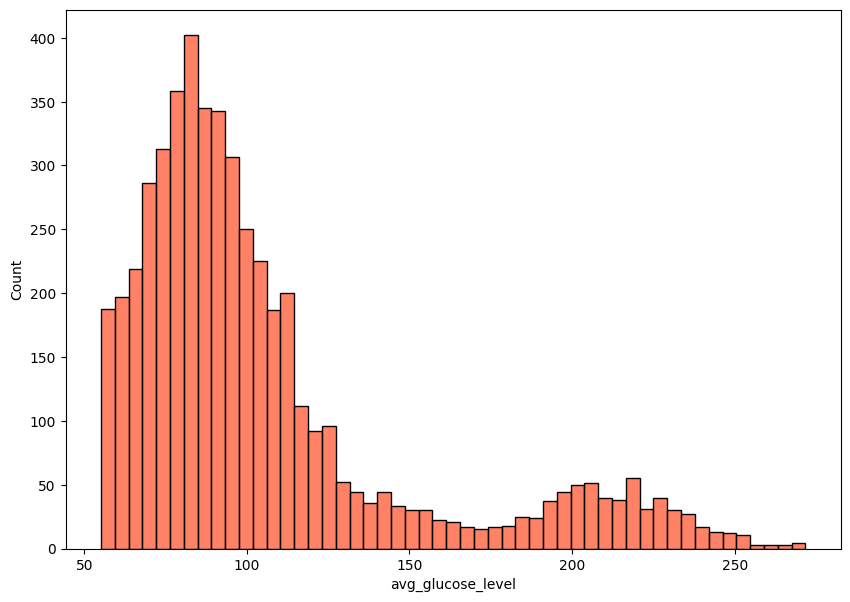

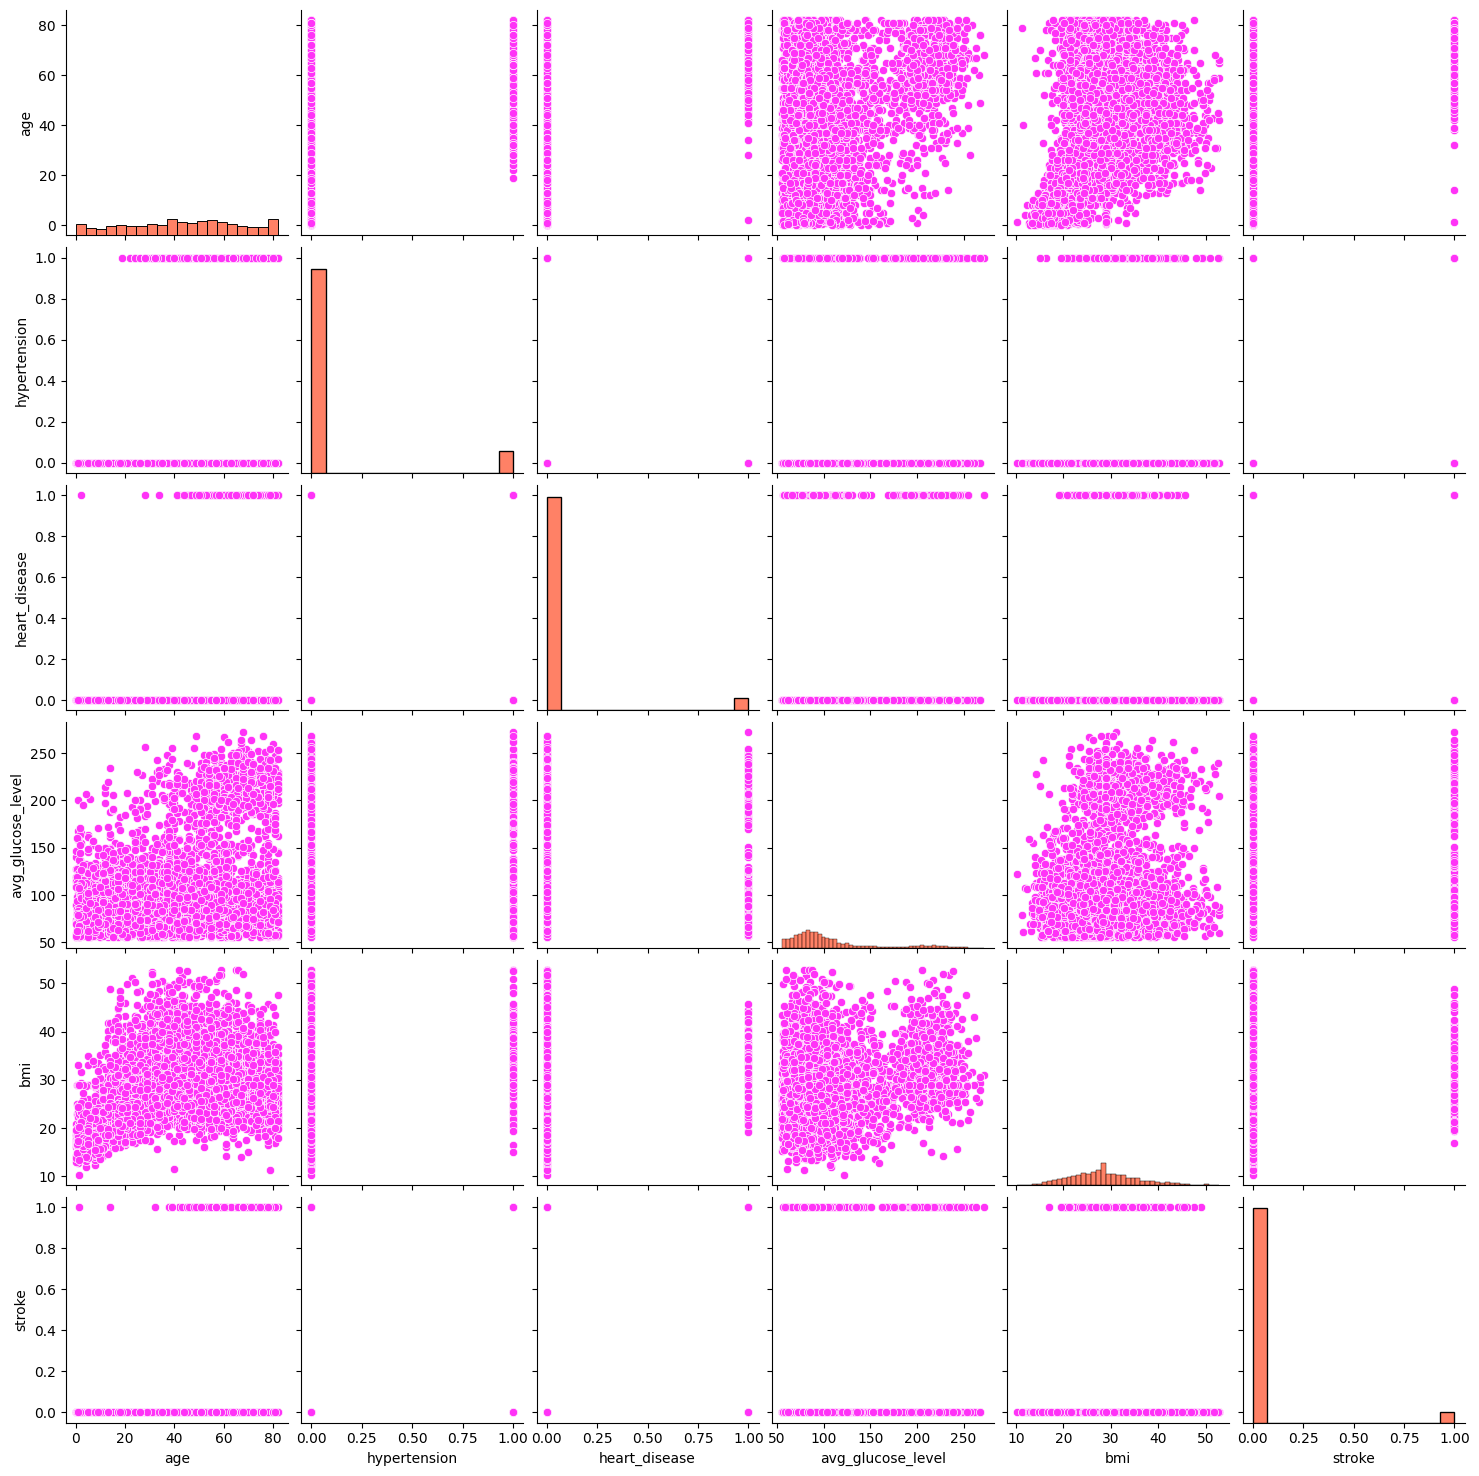

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = ['#FF5733', '#33FF57', '#5733FF']  # You can add more colors here
scatter_color = '#FF33F7'  # Custom color for the scatterplots

plt.figure(figsize=(10, 7))
# Histogram with the custom color
sns.histplot(df['avg_glucose_level'], color=custom_palette[0])

# Pairplot with the custom color palette and scatter color
sns.pairplot(df, palette=custom_palette, diag_kws={'color': custom_palette[0]}, plot_kws={'color': scatter_color})

plt.show()


MODEL ACCURACY

<Axes: >

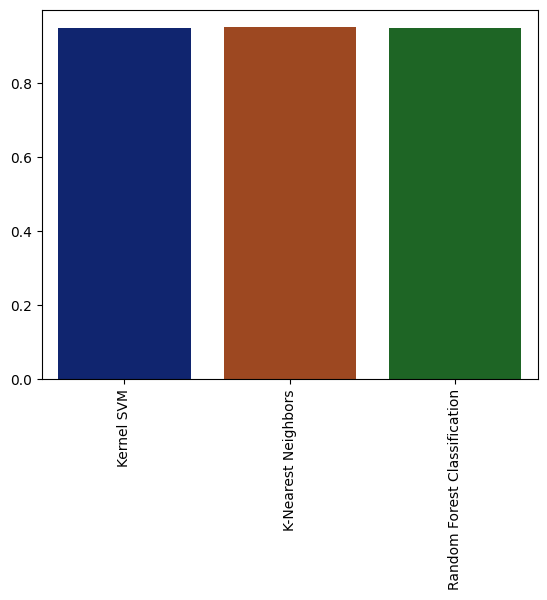

In [172]:
plt.xticks(rotation=90)
sns.barplot(x = model, y = accuracy, palette ='dark')

QUESTION 2) PLOT CONFUSION MATRIX FOR ALL THESE MODELS.

Kernel SVM (Confusion matrix & F1 score)

In [176]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_knn = sc.fit_transform(X_train[:, 16:])
X_test_knn = sc.transform(X_test[:, 16:])

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train_knn, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test_knn)

# Making the Confusion Matrix and Calculating the Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

acc3 = accuracy_score(y_test, y_pred)
accuracy.append(acc3)
model.append('K-Nearest Neighbors')
print("K-Nearest Neighbours's Accuracy :", acc3)

# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X_train, y_train, cv=10)
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# F1- score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1: {:.2f}'.format(f1))


[[961   0]
 [ 50   1]]
K-Nearest Neighbours's Accuracy : 0.950592885375494
K-Fold Validation Mean Accuracy: 95.08 %
Standard Deviation: 0.17 %
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       961
           1       1.00      0.02      0.04        51

    accuracy                           0.95      1012
   macro avg       0.98      0.51      0.51      1012
weighted avg       0.95      0.95      0.93      1012

F1: 0.04


RANDOM FOREST(WITH Confusion Matrix & F1 Score)

In [177]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix and Calculating the Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

acc6 = accuracy_score(y_test, y_pred)
accuracy.append(acc6)
model.append('Random Forest Classification')
print("Random Forest Classification's Accuracy:", acc6)
# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X_train, y_train, cv=10)
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# F1- score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1: {:.2f}'.format(f1))

[[959   2]
 [ 49   2]]
Random Forest Classification's Accuracy: 0.9496047430830039
K-Fold Validation Mean Accuracy: 94.86 %
Standard Deviation: 0.21 %
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       961
           1       0.50      0.04      0.07        51

    accuracy                           0.95      1012
   macro avg       0.73      0.52      0.52      1012
weighted avg       0.93      0.95      0.93      1012

F1: 0.07


QUESTION 3)

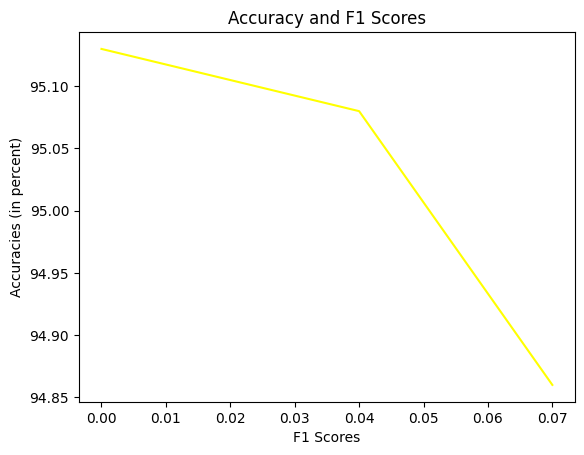

In [179]:
import matplotlib.pyplot as plt

accuracies = [95.13, 95.08, 94.86]
f1_scores = [0.00, 0.04, 0.07]

plt.plot(f1_scores, accuracies, color='yellow')
plt.xlabel('F1 Scores')
plt.ylabel('Accuracies (in percent)')
plt.title('Accuracy and F1 Scores')
plt.show()


Question 4



(A) A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems and regression.

(B) SVMs are used in applications like handwriting recognition, intrusion detection, face detection, email classification, gene classification, and in web pages. This is one of the reasons we use SVMs in machine learning.

(C) It can handle both classification and regression on linear and non-linear data.

(D) Out of all the three models, SVM model is being chosen as best because it has the accuracy of 95.13% *which is the highest among all the three models. An SVM classifies data by *finding the best hyperplane that separates all data points of one class from those of the other class. The best hyperplane for an SVM means the one with the largest margin between the two classes.

QUESTION 5)

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,auc
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
pd.set_option('Display.max_columns',None)
pd.options.plotting.backend = "plotly"
from imblearn.over_sampling import SMOTE

In [181]:
df = pd.get_dummies(df,drop_first=True)

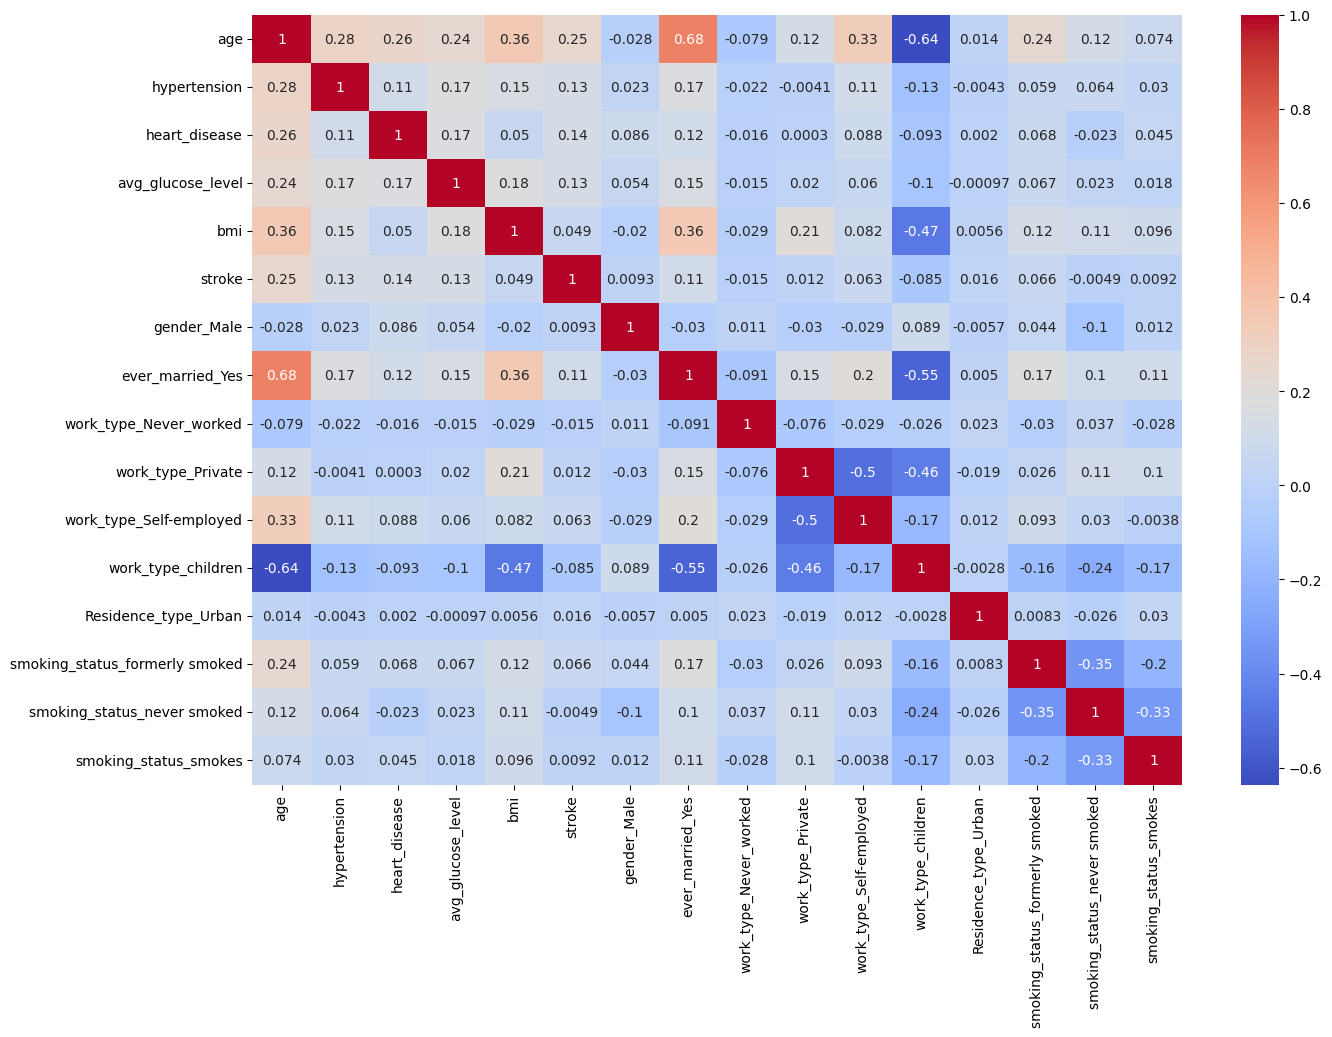

In [182]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot = True)
plt.show()

In [183]:
x = df.drop('stroke',axis = 1)
y = df.stroke

In [186]:
from sklearn.model_selection import train_test_split

# Assuming you have your features 'x' and target 'y' defined

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=47)


In [199]:
model_params = {
    'svm': {
        'model': SVC(),
        'params': {
            'C': [1, 2, 3],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
        }
    },
    'logistic': {
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        }
    },
    'RF': {
        'model': RandomForestClassifier(n_jobs=-1),
        'params': {
            'n_estimators': [50, 100],
            'criterion': ["gini", "entropy"]
        }
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ["gini", "entropy"],
            'splitter': ["best", "random"]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    }
}


In [200]:
scores = []  # List for all the best scores
target_column = 'stroke'  # Replace 'stroke' with the actual name of your target column

for model_name, modelp in model_params.items():
    clf = GridSearchCV(modelp['model'], modelp['params'], cv=3, return_train_score=False, n_jobs=-1)
    clf.fit(X, df[target_column])
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

scoreddf = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
scoreddf


,model,best_score,best_params
0,svm,0.950959,"{'C': 1, 'kernel': 'linear'}"
1,logistic,0.951157,"{'penalty': 'l2', 'solver': 'lbfgs'}"
2,RF,0.949971,"{'criterion': 'gini', 'n_estimators': 100}"
3,DT,0.911804,"{'criterion': 'entropy', 'splitter': 'random'}"
4,KNN,0.948784,"{'metric': 'manhattan', 'n_neighbors': 7, 'wei..."


In [212]:
print(scoreddf)


      model  best_score                                        best_params
0       svm    0.950959                       {'C': 1, 'kernel': 'linear'}
1  logistic    0.951157               {'penalty': 'l2', 'solver': 'lbfgs'}
2        RF    0.949971         {'criterion': 'gini', 'n_estimators': 100}
3        DT    0.911804     {'criterion': 'entropy', 'splitter': 'random'}
4       KNN    0.948784  {'metric': 'manhattan', 'n_neighbors': 7, 'wei...


In [205]:
rf = RandomForestClassifier(n_jobs=-1,criterion = 'gini', n_estimators = 50)


In [206]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=50, n_jobs=-1)

In [210]:
ypred = rf.predict(xtest)

In [211]:
#Accuracy
print(f'Models Accuracy = {round(accuracy_score(ytest,ypred)*100,2)}%')

Models Accuracy = 94.07%


In [213]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [214]:
y_pred = classifier.predict(X_test)

In [215]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc2 = accuracy_score(y_test, y_pred)

[[961   0]
 [ 51   0]]


In [216]:
print(f"Accuracy score: {acc2}")

Accuracy score: 0.9496047430830039


Training the K-NN model on the Training set

In [217]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [218]:
acc3 = accuracy_score(y_test, y_pred)

In [219]:
print(f"Accuracy score: {acc3}")

Accuracy score: 0.9496047430830039


*Training* the Naive Bayes on the Training set

In [220]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [221]:
y_pred = classifier.predict(X_test)

In [222]:
acc4 = accuracy_score(y_test, y_pred)

In [223]:
print(f"Accuracy score : {acc4}")

Accuracy score : 0.5138339920948617


Training Decision Tree Classification on Train set

In [224]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [225]:
y_pred = classifier.predict(X_test)

In [226]:
acc5 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc5}")

Accuracy score: 0.9179841897233202


Create visualization for all model with their Accuracy

In [235]:
accuracies = []
for model_name, model in models.items():
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    acc = accuracy_score(ytest, ypred)
    accuracies.append(acc)

scoreddf['accuracy'] = accuracies

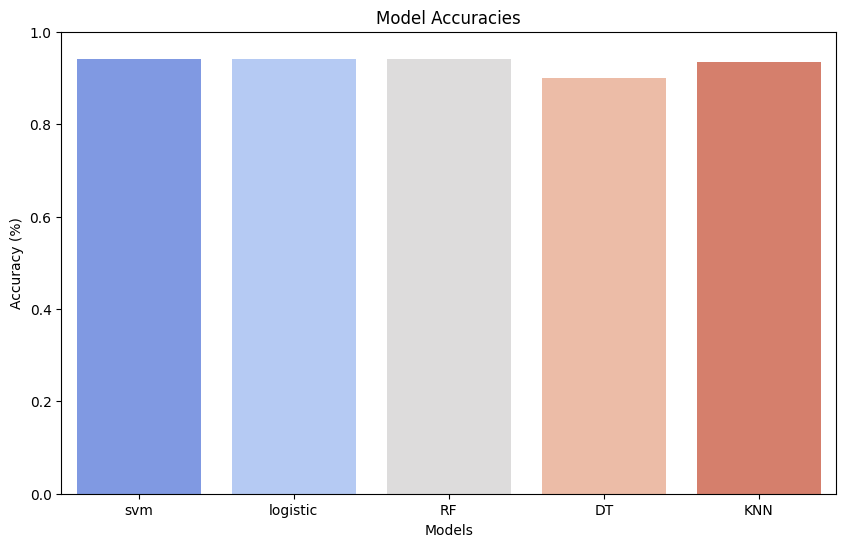

In [237]:
# Visualization of Model Accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='accuracy', data=scoreddf, palette='coolwarm')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies')
plt.ylim(0, 1)
plt.show()
